In [10]:
import mujoco
import mujoco_viewer
import matplotlib.pyplot as plt
import numpy as np
import os
from lxml import etree
import mujoco.viewer
import time


In [11]:
filepath = "model.xml"
model = mujoco.MjModel.from_xml_path(filepath)
data = mujoco.MjData(model)


In [ ]:
SIMEND = 20
TIMESTEP = 0.001
STEP_NUM = int(SIMEND / TIMESTEP)
timeseries = np.linspace(0, SIMEND, STEP_NUM)
def set_torque(t):
    A = 30
    data.ctrl[0] = A*np.sin(20*t)
    data.ctrl[1] = -A*np.sin(20*t)

Carriage_pos_x = []
Carriage_pos_z = []
site_id = mujoco.mj_name2id(model, mujoco.mjtObj.mjOBJ_SITE, "carriage")
viewer = mujoco_viewer.MujocoViewer(model,
                                    data,
                                    title="Tendon",
                                    width=1920,
                                    height=1080)


for i in range(STEP_NUM):
    if viewer.is_alive:
        set_torque(data.time)

        Carriage_pos = data.site_xpos[site_id]
        Carriage_pos_x.append(Carriage_pos[0])
        Carriage_pos_z.append(Carriage_pos[2])

        mujoco.mj_step(model, data)
        viewer.render()

    else:
        break
viewer.close()


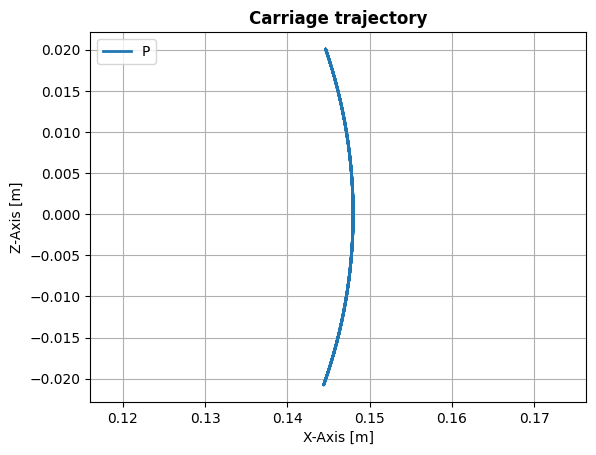

In [ ]:
midlength = int(STEP_NUM/2)

plt.clf()
plt.plot(Carriage_pos_x[midlength:STEP_NUM], Carriage_pos_z[midlength:STEP_NUM], '-', linewidth=2, label='P')
plt.title('Carriage trajectory', fontsize=12, fontweight='bold')
plt.legend(loc='upper left')
plt.xlabel('X-Axis [m]')
plt.ylabel('Z-Axis [m]')
plt.axis('equal')
plt.grid()
plt.draw()